# LOGISTIC REGRESSION

In [1]:
#Importing necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Program 1:  Weekly dataset.

In [4]:
#Loading the dataset
Weekly=pd.read_csv("C:/Users/nisha/Downloads/Weekly.csv")
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


#### Data preprocessing:

In [5]:
#Checking for missing and null values
Weekly.isna().sum()

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

In [9]:
Weekly.isnull().sum()

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

In [10]:
#Shape of the data:
Weekly.shape

(1089, 9)

In [11]:
#Checking the datatypes of the variables:
Weekly.dtypes

Year           int64
Lag1         float64
Lag2         float64
Lag3         float64
Lag4         float64
Lag5         float64
Volume       float64
Today        float64
Direction     object
dtype: object

#### (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [13]:
#Statistical summary of the dataset
Weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [14]:
Weekly["Direction"].value_counts()

Up      605
Down    484
Name: Direction, dtype: int64

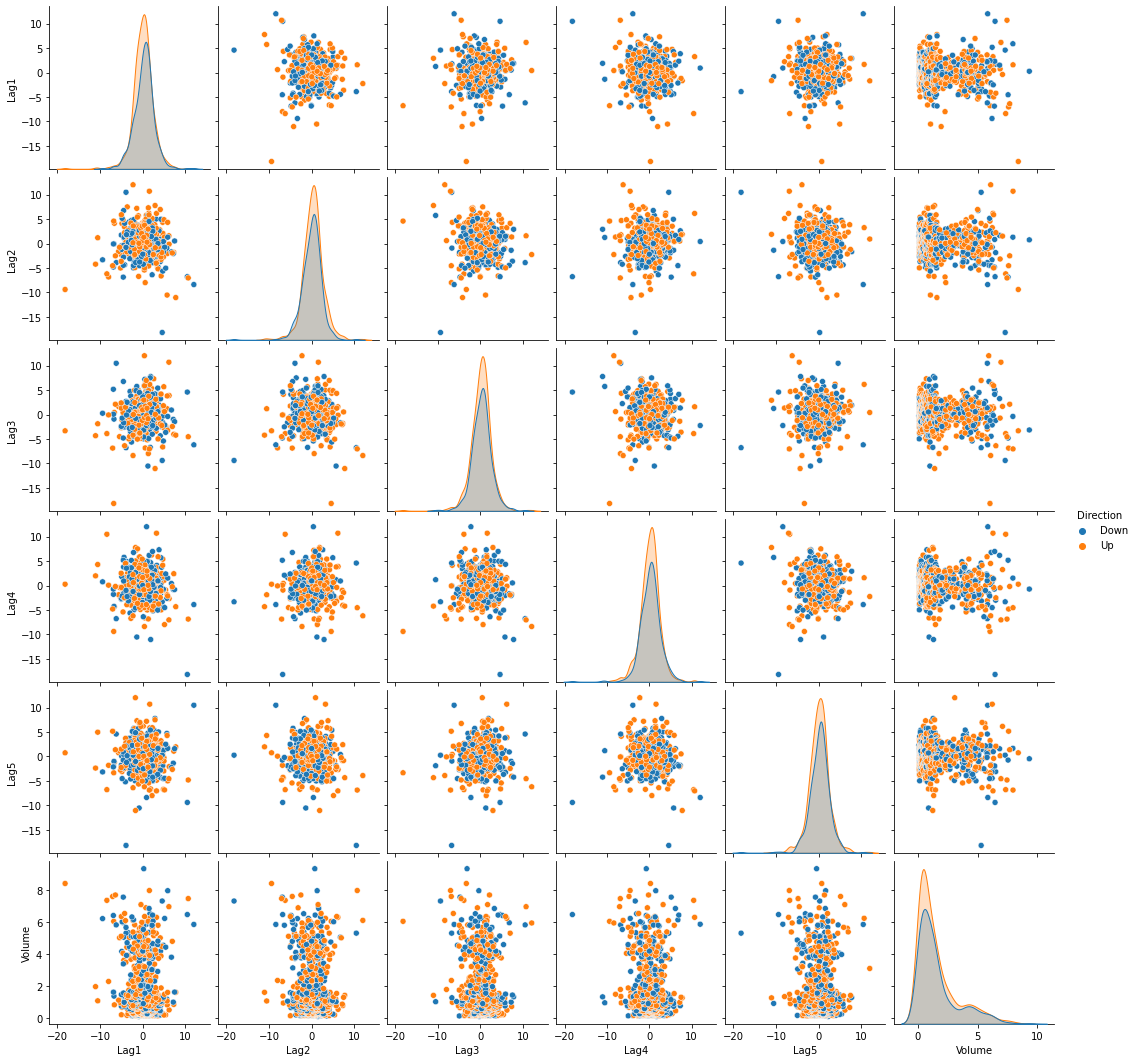

In [15]:
#Graphical summary of the dataset
sns.pairplot(Weekly, vars=['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'], hue='Direction')

<AxesSubplot:>

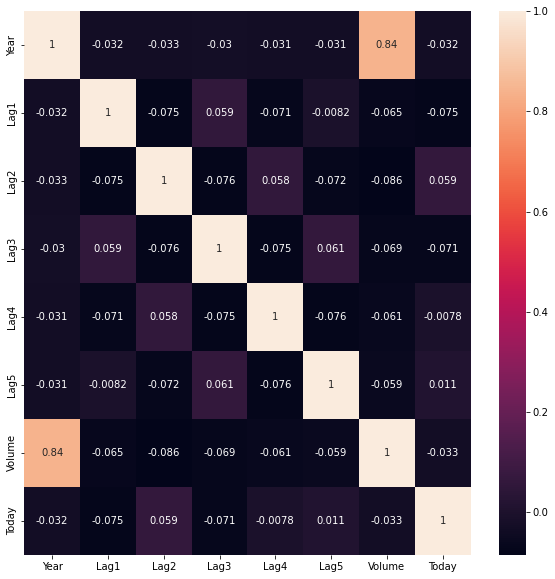

In [16]:
#Heatmap of the correlation matrix of all the variables in the dataset.
plt.figure(figsize=(10,10))
sns.heatmap(Weekly.corr(), annot=True)

#### b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [35]:
Weekly = pd.get_dummies(Weekly).drop('Direction_Down', axis=1)
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Cat,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1,1


In [39]:
#Independent Variables 
X= pd.DataFrame(Weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']])
#Dependent Variable
Y= pd.DataFrame(Weekly[['Direction_Up']])

In [40]:
#Spliting the data into training and test sets using the scikit-learn train_test_split() function.
x_train,x_test,y_train,y_test=tts(X,Y,test_size=0.3)

#Fitting a logistic regression model:
lr = sm.Logit(y_train,x_train).fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 8.454780
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           Direction_Up   No. Observations:                  762
Model:                          Logit   Df Residuals:                      756
Method:                           MLE   Df Model:                            5
Date:                Tue, 28 Mar 2023   Pseudo R-squ.:                     inf
Time:                        21:36:04   Log-Likelihood:                -6442.5
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag1          -0.0458      0.032     -1.445      0.148      -0.108       0.016
Lag2           0.0861      0.

C:\Users\nisha\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\nisha\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\nisha\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [41]:
#Predicting and model metrics:
y_pred=lrm.predict(x_test)


acc= accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)

In [42]:
print("Accuracy: " ,acc)
print("F1 score: ", f1)
print("Recall: ", rec)
print("Precision: ", prec)

Accuracy:  0.5412844036697247
F1 score:  0.6835443037974684
Recall:  0.8756756756756757
Precision:  0.5605536332179931


#### (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [34]:
#Computing the confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cm)


print("\n True Positives:",cm[0][0])
print("\n True Negatives:",cm[0][1])
print("\n False Positives:",cm[1][0])
print("\n False Positives:",cm[1][1])

Confusion Matrix:
[[ 13 136]
 [ 22 156]]

 True Positives: 13

 True Negatives: 136

 False Positives: 22

 False Positives: 156


#### (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010)

In [43]:
train = Weekly.loc[Weekly['Year'] <= 2008]
test = Weekly.loc[Weekly['Year'] >= 2009]

X1 = train[['Lag2']]
X1 = sm.add_constant(X1, prepend=True)
y = train['Direction_Up']

lr1 = sm.Logit(y, X1).fit()
print(lr1.summary())


Optimization terminated successfully.
         Current function value: 0.888927
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           Direction_Up   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Tue, 28 Mar 2023   Pseudo R-squ.:                     inf
Time:                        21:38:42   Log-Likelihood:                -875.59
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

C:\Users\nisha\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\nisha\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\nisha\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [44]:
X_test = test[['Lag2']]
X_test = sm.add_constant(X_test, prepend=True)
y_test = test['Direction_Cat']
predictions = lr1.predict(X_test) > 0.5

print("\t\t Confusion Matrix")
print("\t Down Up(Predicted)")
print("Down \t" + str(confusion_matrix(y_test, predictions)[0]))
print("Up \t" + str(confusion_matrix(y_test, predictions)[1]))

		 Confusion Matrix
	 Down Up(Predicted)
Down 	[ 9 34]
Up 	[ 5 56]


### Program-2 : Auto dataset

In [45]:
Auto=pd.read_csv("C:/Users/nisha/Downloads/Auto.csv", na_values = ["?"])
Auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


#### Data preprocessing:

In [46]:
#Checking for missing and null values:
Auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [47]:
Auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [48]:
#Shape of the data:
Auto.shape

(397, 9)

In [49]:
# Drop the rows which contain missing values
Auto.dropna(inplace = True)
# Check the dimensions of the dataframe
Auto.shape

(392, 9)

In [50]:
#Statistical summary:
Auto.describe().T


,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


In [52]:
#Info
Auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


#### (a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

In [53]:
mpg01 = (Auto["mpg"] > Auto["mpg"].median()).map({False: "0", True: "1"})
Auto["mpg01"] = mpg01
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0


In [54]:
Auto['mpg01']=Auto['mpg01'].astype('category')

Auto.dtypes


mpg              float64
cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
year               int64
origin             int64
name              object
mpg01           category
dtype: object

#### (b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatter plots and box plots may be useful tools to answer this question. Describe your findings

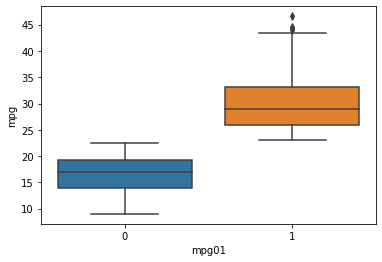

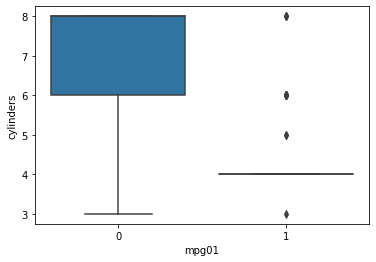

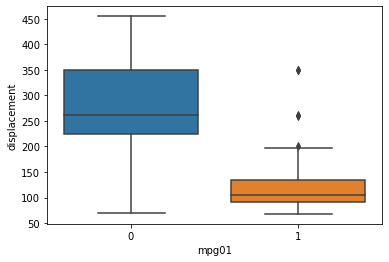

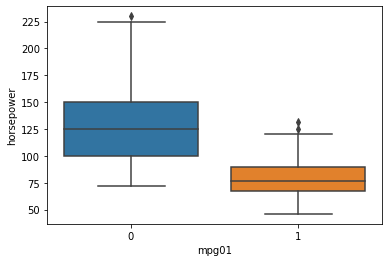

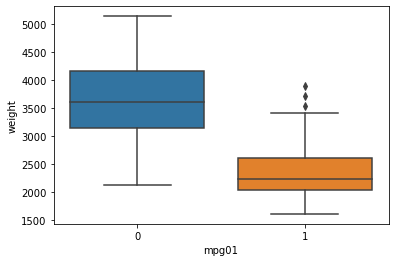

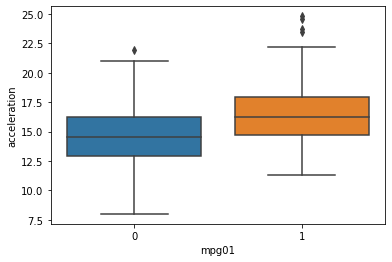

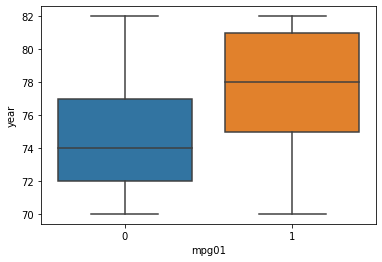

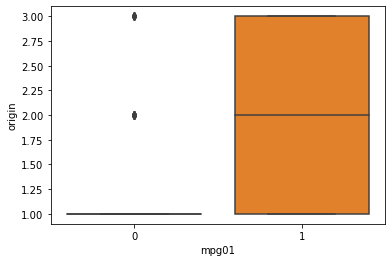

In [57]:
for c in Auto.columns.drop(['mpg01', 'name']):
    sns.boxplot(x=Auto['mpg01'], y=Auto[c])
    plt.show();

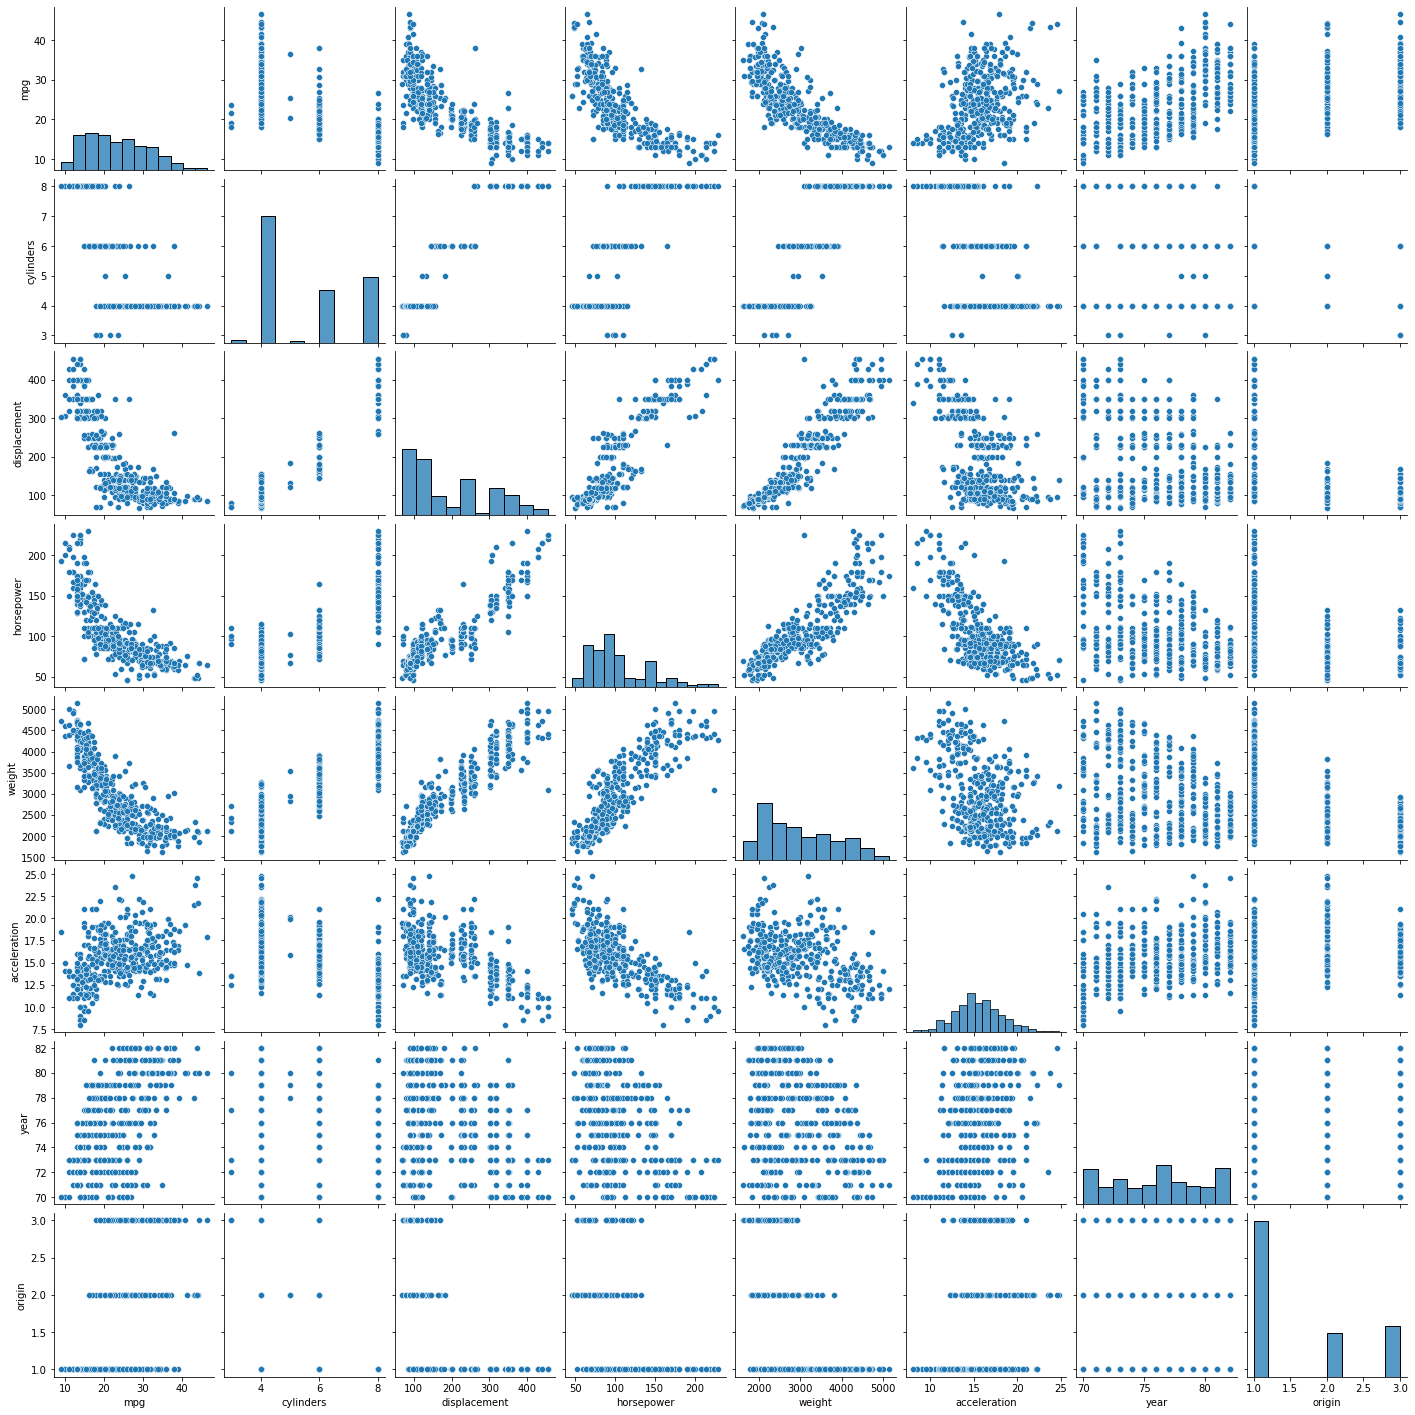

In [59]:
sns.pairplot(Auto);

<AxesSubplot:>

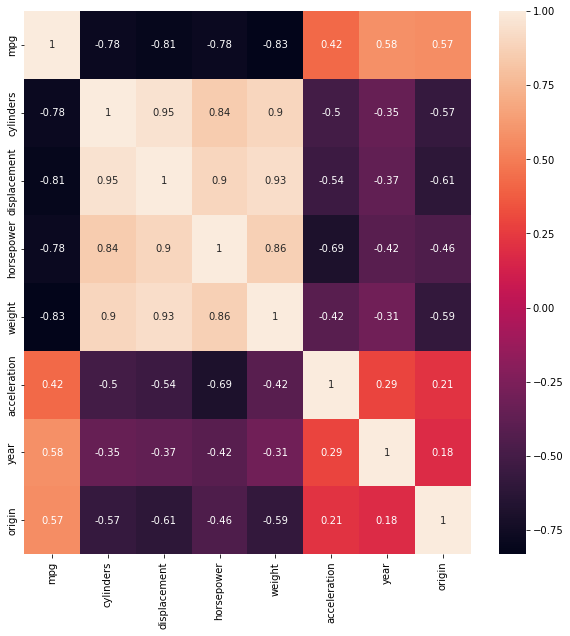

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(Auto.corr(), annot=True)

#### (c) Split the data into a training set and a test set.

In [61]:
x=Auto[['cylinders','displacement','horsepower','weight','year','origin','acceleration']]
y=Auto['mpg01']
#Spliting the data into training and test sets using the scikit-learn train_test_split() function.
X_train,X_test,Y_train,Y_test=tts(x,y,test_size=0.3)

#### d) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [62]:
#Fitting logistic regression
lrm1=LogisticRegression()
print(lrm1.fit(X_train,Y_train))

LogisticRegression()


In [63]:
y_pred1=lrm1.predict(X_test)

In [64]:
acc1=accuracy_score(Y_test,y_pred1)
f1=f1_score(Y_test,y_pred1,average="binary", pos_label="0")
rec1=recall_score(Y_test,y_pred1,average="binary", pos_label="0")
prec1=precision_score(Y_test,y_pred1,average="binary", pos_label="0")

print(acc1)
print(f1)
print(rec1)
print(prec1)


0.9576271186440678
0.9606299212598426
0.9384615384615385
0.9838709677419355


1 - score(): We subtract the accuracy or R^2 score from 1. This gives us the test error of the model, which represents the proportion of misclassified instances or the error in the model's predictions.

 A lower test error indicates that the model is performing better on the test data, while a higher test error indicates that the model needs to be improved or further evaluated using other performance metrics.


In [65]:
# Evaluate the model on the test data
test_error = 1 - lrm1.score(X_test, Y_test)
print('Test error:', test_error)


Test error: 0.0423728813559322
